In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as  sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
#pip install imblearn

In [3]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")

In [4]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
data.mean()

C:\Users\10\AppData\Local\Temp\ipykernel_19200\531903386.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


customer_id         1.569094e+07
credit_score        6.505288e+02
age                 3.892180e+01
tenure              5.012800e+00
balance             7.648589e+04
products_number     1.530200e+00
credit_card         7.055000e-01
active_member       5.151000e-01
estimated_salary    1.000902e+05
churn               2.037000e-01
dtype: float64

In [9]:
data[data["age"]>90] #check Age(outliner)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
6443,15764927,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6759,15660878,705,France,Male,92,1,126076.24,2,1,1,34436.83,0


In [10]:
correlation = data.corr(numeric_only=True).round(2)

In [11]:
correlation

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.00,0.01,0.01,-0.01,-0.01,0.02,-0.01,0.00,0.02,-0.01
credit_score,0.01,1.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03
age,0.01,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
tenure,-0.01,0.00,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01
balance,-0.01,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12
products_number,0.02,0.01,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05
credit_card,-0.01,-0.01,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01,-0.01
active_member,0.00,0.03,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16
estimated_salary,0.02,-0.00,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01
churn,-0.01,-0.03,0.29,-0.01,0.12,-0.05,-0.01,-0.16,0.01,1.00


In [12]:
abs(correlation['churn']).sort_values(ascending=False)

churn               1.00
age                 0.29
active_member       0.16
balance             0.12
products_number     0.05
credit_score        0.03
customer_id         0.01
tenure              0.01
credit_card         0.01
estimated_salary    0.01
Name: churn, dtype: float64

In [13]:
plt.figure(figsize=(12,18))

<Figure size 1200x1800 with 0 Axes>

<Figure size 1200x1800 with 0 Axes>

<Axes: xlabel='credit_score', ylabel='Count'>

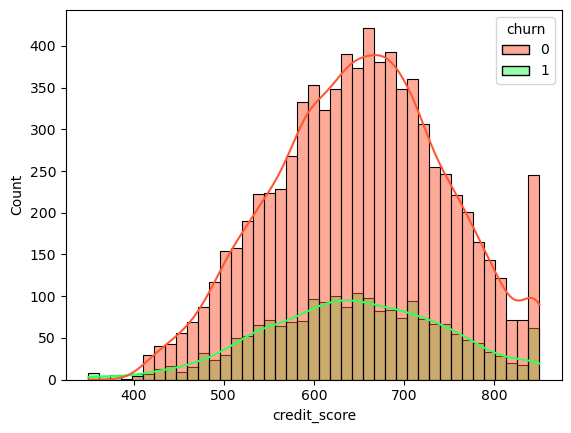

In [14]:
colors = ["#FF5733", "#33FF57", "#3366FF", "#FF33CC", "#FFFF33"]

# Set the custom palette as the current palette
sns.set_palette(colors)
sns.histplot(data, x='credit_score', hue='churn', kde=True)


<Axes: xlabel='age', ylabel='Count'>

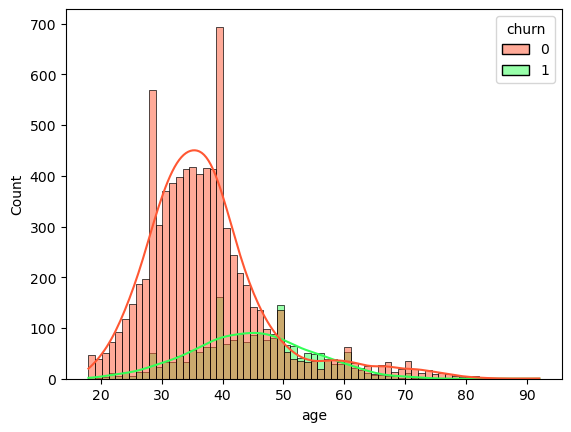

In [15]:
sns.set_palette(colors)
sns.histplot(data, x='age', hue='churn', kde=True)

<Axes: xlabel='balance', ylabel='Count'>

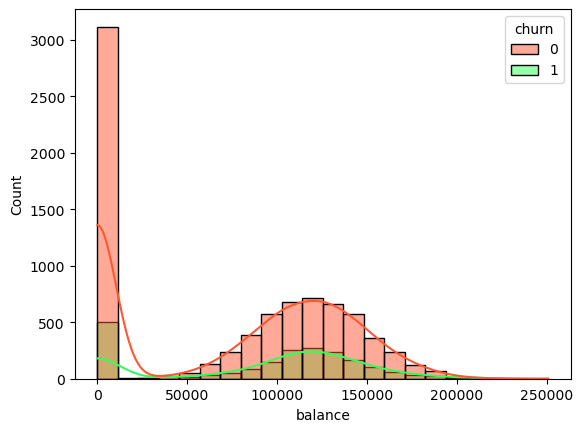

In [16]:
sns.set_palette(colors)
sns.histplot(data, x='balance', hue='churn', kde=True)

<Axes: xlabel='estimated_salary', ylabel='Count'>

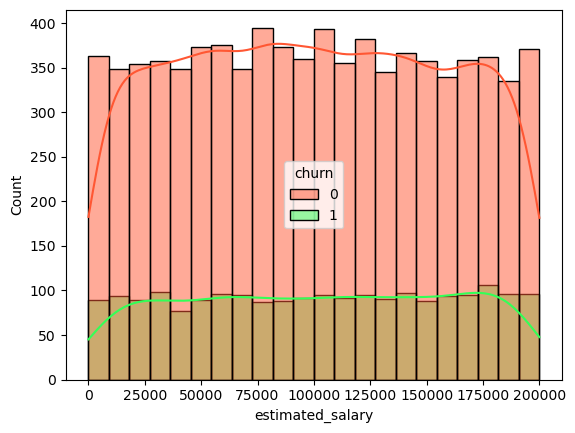

In [17]:
sns.set_palette(colors)
sns.histplot(data, x='estimated_salary', hue='churn', kde=True)

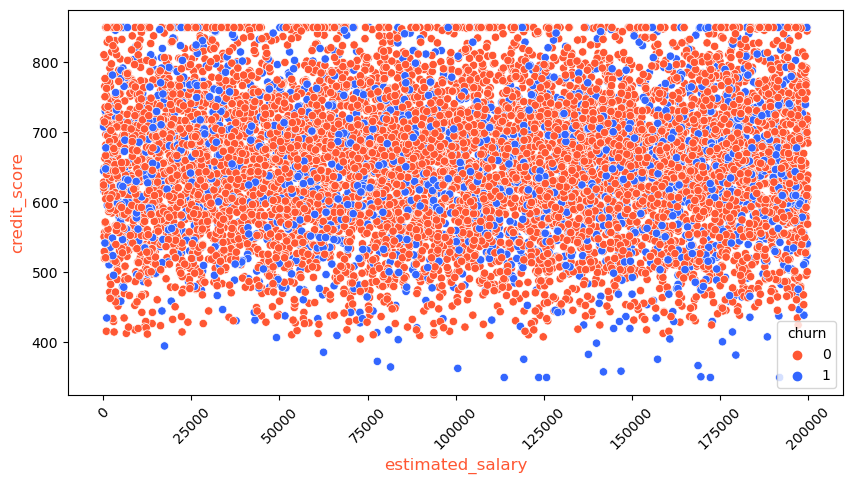

In [18]:
plt.figure(figsize=(10,5))

sns.scatterplot(data=data, x='estimated_salary', y='credit_score', hue='churn', palette=[colors[0], colors[2]])
plt.xlabel('estimated_salary', fontsize=12, color=colors[0])
plt.ylabel('credit_score', fontsize=12, color=colors[0])
plt.xticks(rotation=45)

plt.show()

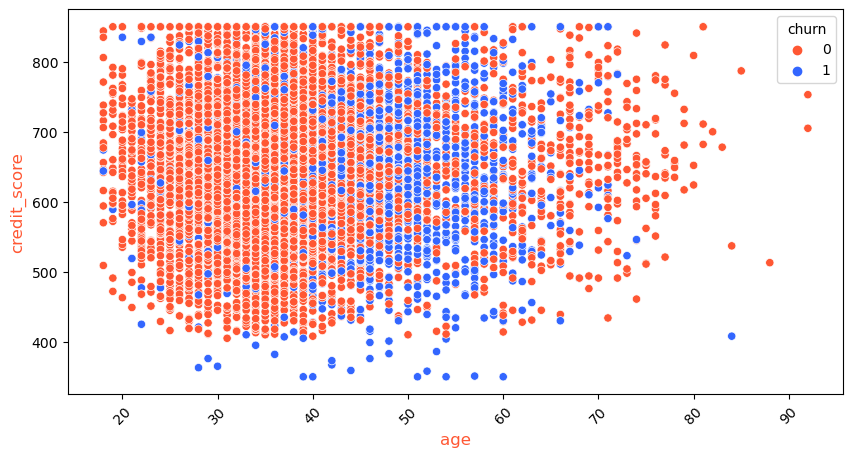

In [19]:
plt.figure(figsize=(10,5))

sns.scatterplot(data=data, x='age', y='credit_score', hue='churn', palette=[colors[0], colors[2]])
plt.xlabel('age', fontsize=12, color=colors[0])
plt.ylabel('credit_score', fontsize=12, color=colors[0])
plt.xticks(rotation=45)

plt.show()

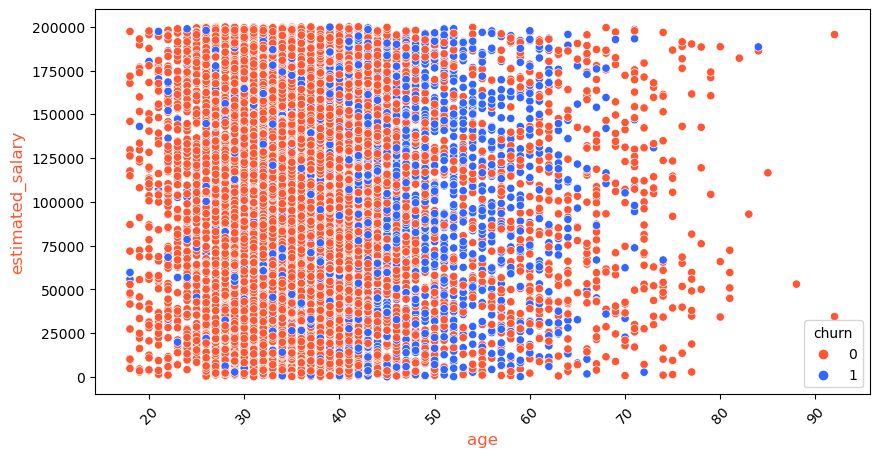

In [20]:
plt.figure(figsize=(10,5))

sns.scatterplot(data=data, x='age', y='estimated_salary', hue='churn', palette=[colors[0], colors[2]])
plt.xlabel('age', fontsize=12, color=colors[0])
plt.ylabel('estimated_salary', fontsize=12, color=colors[0])
plt.xticks(rotation=45)

plt.show()

<Axes: xlabel='gender', ylabel='Count'>

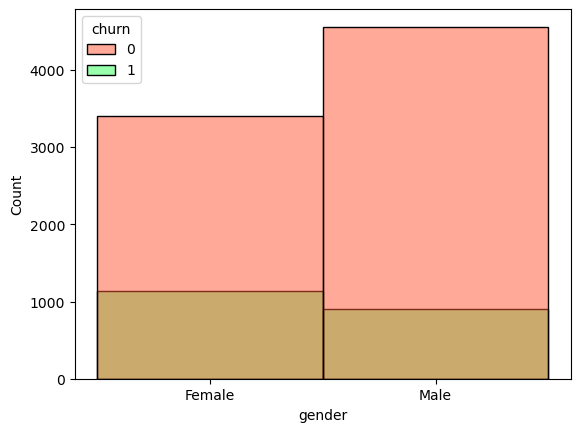

In [21]:
sns.set_palette(colors)
sns.histplot(data,x = "gender", hue='churn')

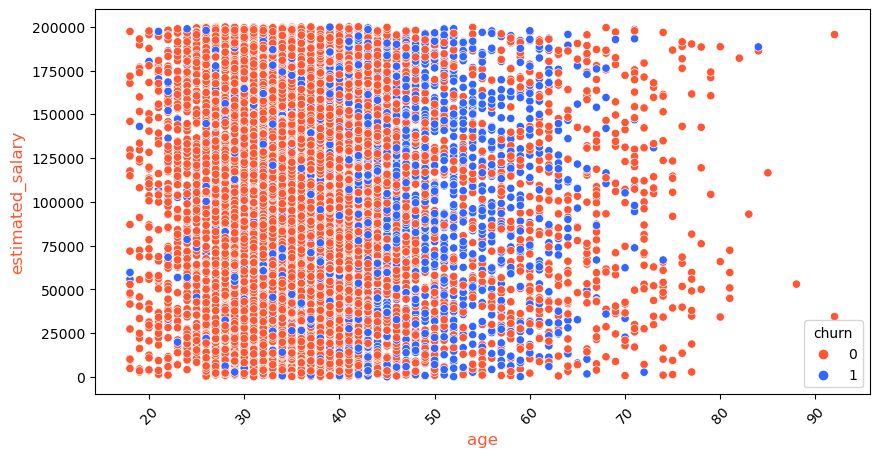

In [22]:
plt.figure(figsize=(10,5))

sns.scatterplot(data=data, x='age', y='estimated_salary', hue='churn', palette=[colors[0], colors[2]])
plt.xlabel('age', fontsize=12, color=colors[0])
plt.ylabel('estimated_salary', fontsize=12, color=colors[0])
plt.xticks(rotation=45)

plt.show()

In [23]:
#data preprocess

In [24]:
df = data.copy()

In [25]:
#get dummies
df["gender"] = LabelEncoder().fit_transform(df["gender"])
df["country"] = LabelEncoder().fit_transform(df["country"])

In [26]:
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [27]:
#prepare data for Smooteen
X = df.drop(columns = "churn",axis = 1)

In [28]:
Y = df["churn"]

In [29]:
X_df,Y_df=SMOTEENN().fit_resample(X,Y)

In [30]:
X_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58
1,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10
2,15632264,476,0,0,34,10,0.00,2,1,0,26260.98
3,15600882,635,2,0,35,7,0.00,2,1,1,65951.65
4,15788218,549,2,0,24,9,0.00,2,1,1,14406.41


In [31]:
#splitdata

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X_df,Y_df,test_size=0.3)

In [33]:
X_train

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
5825,15769405,799,1,1,57,2,135093.142911,1,1,0,187234.693592
564,15771636,793,2,0,36,0,0.000000,1,0,0,148993.470000
4187,15813354,549,0,1,49,1,119766.175197,1,0,0,85077.134210
4030,15633194,771,0,0,41,10,108309.000000,4,1,1,137510.410000
6501,15793152,590,1,0,52,3,112502.330074,1,1,0,177148.029392
...,...,...,...,...,...,...,...,...,...,...,...
187,15763063,685,2,0,25,10,128509.630000,1,1,0,121562.330000
3358,15692416,358,2,0,52,8,143542.360000,3,1,0,141959.110000
1330,15582276,638,0,1,34,5,133501.360000,1,0,1,155643.040000
7084,15759729,704,1,0,48,1,160943.453116,1,0,0,157303.607956


In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [37]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)

In [38]:
test = pd.DataFrame()
test["pred"] = Y_pred
test["actual"] = Y_test

In [39]:
test

,pred,actual
0,1,NaN
1,0,NaN
2,0,0.0
3,0,NaN
4,0,0.0
...,...,...
2285,1,NaN
2286,1,NaN
2287,1,NaN
2288,0,NaN


In [40]:
confusion = confusion_matrix(Y_test, Y_pred)
confusion

array([[ 782,  169],
       [  96, 1243]], dtype=int64)

In [41]:
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.8842794759825328

In [42]:
precision = precision_score(Y_test, Y_pred)
precision

0.8803116147308782

In [43]:
recall = recall_score(Y_test, Y_pred)
recall

0.9283047050037341

In [44]:
f1 = f1_score(Y_test, Y_pred)
f1

0.9036713922210103

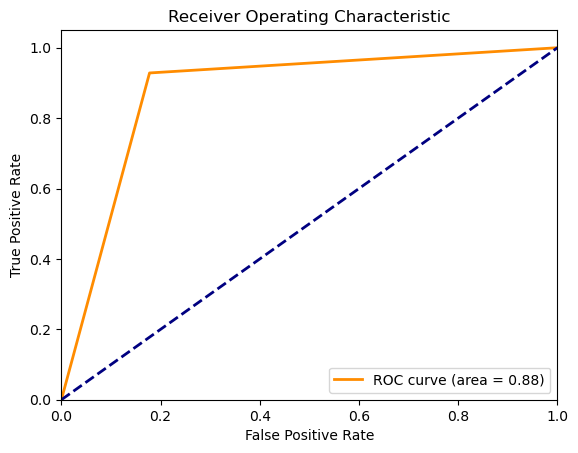

In [45]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [46]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86       951
           1       0.88      0.93      0.90      1339

    accuracy                           0.88      2290
   macro avg       0.89      0.88      0.88      2290
weighted avg       0.88      0.88      0.88      2290

